In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import dask.array as da
import xarray as xr


from xmitgcm import open_mdsdataset
import xmitgcm
import ecco_v4_py as ecco


from netCDF4 import Dataset

import seawater

from analysis_package import plotting_functions
from analysis_package import open_datasets
from analysis_package import derive_potential_density_values_TEST
from analysis_package import ecco_masks

from importlib import reload

# reload modules for prototyping...
ecco_masks = reload(ecco_masks)
plotting_functions = reload(plotting_functions)
open_datasets = reload(open_datasets)
derive_potential_density_values_TEST = reload(derive_potential_density_values_TEST)


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import os
print(os.getcwd())

/Users/Tatsu1/Projects/pd_ECCO_overturning


In [105]:
output_data_dir = "./overturning_output/"

atl_so_x = 0*xr.open_dataset("./overturning_output/atl_so_depth_integrated_pdens_transport_latx_0_to_11.nc").rename({"__xarray_dataarray_variable__":"psi_x"}).mean(dim="time")
atl_so_y = 0*xr.open_dataset("./overturning_output/atl_so_depth_integrated_pdens_transport_laty_0_to_11.nc").rename({"__xarray_dataarray_variable__":"psi_y"}).mean(dim="time")
atl_so_interp_x = 0*xr.open_dataset("./overturning_output/atl_so_depth_integrated_x_interp_results_0_to_11.nc").rename({"__xarray_dataarray_variable__":"psi_x"}).mean(dim="time")
atl_so_interp_y = 0*xr.open_dataset("./overturning_output/atl_so_depth_integrated_y_interp_results_0_to_11.nc").rename({"__xarray_dataarray_variable__":"psi_y"}).mean(dim="time")

atl_so_dic_x = {}
atl_so_dic_y = {}

atl_so_dic_interp_x = {}
atl_so_dic_interp_y = {}

global_x = 0*xr.open_dataset("./overturning_output/atl_so_depth_integrated_pdens_transport_latx_0_to_11.nc").rename({"__xarray_dataarray_variable__":"psi_x"}).mean(dim="time")
global_y = 0*xr.open_dataset("./overturning_output/atl_so_depth_integrated_pdens_transport_laty_0_to_11.nc").rename({"__xarray_dataarray_variable__":"psi_y"}).mean(dim="time")
global_interp_x = 0*xr.open_dataset("./overturning_output/atl_so_depth_integrated_x_interp_results_0_to_11.nc").rename({"__xarray_dataarray_variable__":"psi_x"}).mean(dim="time")
global_interp_y = 0*xr.open_dataset("./overturning_output/atl_so_depth_integrated_y_interp_results_0_to_11.nc").rename({"__xarray_dataarray_variable__":"psi_y"}).mean(dim="time")

global_dic_x = {}
global_dic_y = {}

global_dic_interp_x = {}
global_dic_interp_y = {}

indpac_so_x = 0*xr.open_dataset("./overturning_output/atl_so_depth_integrated_pdens_transport_latx_0_to_11.nc").rename({"__xarray_dataarray_variable__":"psi_x"}).mean(dim="time")
indpac_so_y = 0*xr.open_dataset("./overturning_output/atl_so_depth_integrated_pdens_transport_laty_0_to_11.nc").rename({"__xarray_dataarray_variable__":"psi_y"}).mean(dim="time")
indpac_so_interp_x = 0*xr.open_dataset("./overturning_output/atl_so_depth_integrated_x_interp_results_0_to_11.nc").rename({"__xarray_dataarray_variable__":"psi_x"}).mean(dim="time")
indpac_so_interp_y = 0*xr.open_dataset("./overturning_output/atl_so_depth_integrated_y_interp_results_0_to_11.nc").rename({"__xarray_dataarray_variable__":"psi_y"}).mean(dim="time")

indpac_so_dic_x = {}
indpac_so_dic_y = {}


indpac_so_dic_interp_x = {}
indpac_so_dic_interp_y = {}



for file in os.listdir(output_data_dir):
    
    if "atl_so" in file and "latx" in file:
        atl_so_dic_x[file] = xr.open_dataset("./overturning_output/"+file).rename({"__xarray_dataarray_variable__":"psi_x"}).mean(dim="time")
        atl_so_x = atl_so_x + atl_so_dic_x[file]
        
    elif "atl_so" in file and "laty" in file:
        atl_so_dic_y[file] = xr.open_dataset("./overturning_output/"+file).rename({"__xarray_dataarray_variable__":"psi_y"}).mean(dim="time")
        atl_so_y = atl_so_y + atl_so_dic_y[file]
        
    elif "global" in file and "latx" in file:
        global_dic_x[file] = xr.open_dataset("./overturning_output/"+file).rename({"__xarray_dataarray_variable__":"psi_x"}).mean(dim="time") 
        global_x = global_x + global_dic_x[file]
        
    elif "global" in file and "laty" in file:
        global_dic_y[file] = xr.open_dataset("./overturning_output/"+file).rename({"__xarray_dataarray_variable__":"psi_y"}).mean(dim="time")
        global_y = global_y + global_dic_y[file]
        
    elif "indpac_so" in file and "latx" in file:
        indpac_so_dic_x[file] = xr.open_dataset("./overturning_output/"+file).rename({"__xarray_dataarray_variable__":"psi_x"}).mean(dim="time")
        indpac_so_x = indpac_so_x + indpac_so_dic_x[file]  
        
    elif "indpac_so" in file and "laty" in file:
        indpac_so_dic_y[file] = xr.open_dataset("./overturning_output/"+file).rename({"__xarray_dataarray_variable__":"psi_y"}).mean(dim="time") 
        indpac_so_y = indpac_so_y + indpac_so_dic_y[file]  
        
    if "atl_so" in file and "x_interp" in file:
        atl_so_dic_interp_x[file] = xr.open_dataset("./overturning_output/"+file).rename({"__xarray_dataarray_variable__":"psi_x"}).mean(dim="time")
        atl_so_interp_x = atl_so_interp_x + atl_so_dic_interp_x[file] 
        
    elif "atl_so" in file and "y_interp" in file:
        atl_so_dic_interp_y[file] = xr.open_dataset("./overturning_output/"+file).rename({"__xarray_dataarray_variable__":"psi_y"}).mean(dim="time")
        atl_so_interp_y = atl_so_interp_y + atl_so_dic_interp_y[file] 
        
    elif "global" in file and "x_interp" in file:
        global_dic_interp_x[file] = xr.open_dataset("./overturning_output/"+file).rename({"__xarray_dataarray_variable__":"psi_x"}).mean(dim="time")
        global_interp_x = global_interp_x + global_dic_interp_x[file] 
        
    elif "global" in file and "y_interp" in file:
        global_dic_interp_y[file] = xr.open_dataset("./overturning_output/"+file).rename({"__xarray_dataarray_variable__":"psi_y"}).mean(dim="time")
        global_interp_y = global_interp_y + global_dic_interp_y[file] 
        
    elif "indpac" in file and "x_interp" in file:
        indpac_so_dic_interp_x[file] = xr.open_dataset("./overturning_output/"+file).rename({"__xarray_dataarray_variable__":"psi_x"}).mean(dim="time")
        indpac_so_interp_x = indpac_so_interp_x + indpac_so_dic_interp_x[file]
        
    elif "indpac" in file and "y_interp" in file:
        indpac_so_dic_interp_y[file] = xr.open_dataset("./overturning_output/"+file).rename({"__xarray_dataarray_variable__":"psi_y"}).mean(dim="time")      
        indpac_so_interp_y = indpac_so_interp_y + indpac_so_dic_interp_y[file]        



In [171]:
atl_overturning = (-1*atl_so_x.psi_x[1:,min_lat:max_lat] - 1*atl_so_y.psi_y[1:,min_lat:max_lat] )/(24.*1e6)# + 1*atl_so_interp_x.psi_x[1:,min_lat:max_lat] + 1*atl_so_interp_y.psi_y[1:,min_lat:max_lat])/24.
indpac_overturning = (-1*indpac_so_x.psi_x[1:,min_lat:max_lat] - 1*indpac_so_y.psi_y[1:,min_lat:max_lat])/(24.*1e6) #+ 1*indpac_so_interp_x.psi_x[1:,min_lat:max_lat] + 1*indpac_so_interp_y.psi_y[1:,min_lat:max_lat])/24.
global_overturning = (-1*global_x.psi_x[1:,min_lat:max_lat] - 1*global_y.psi_y[1:,min_lat:max_lat])/(24.*1e6) #+ 1*global_interp_x.psi_x[1:,min_lat:max_lat] + 1*global_interp_y.psi_y[1:,min_lat:max_lat])/24.

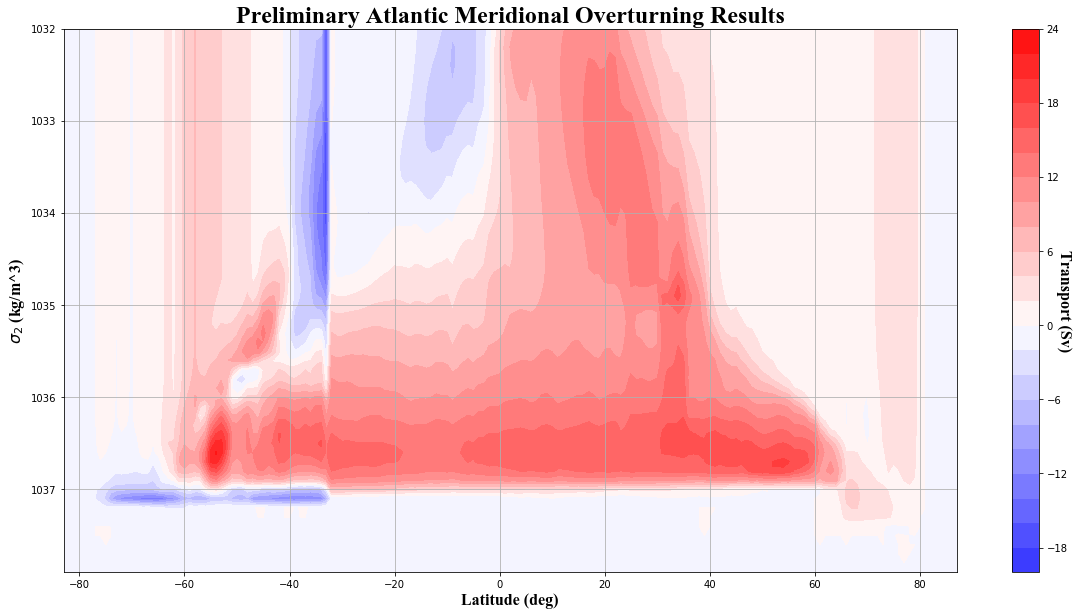

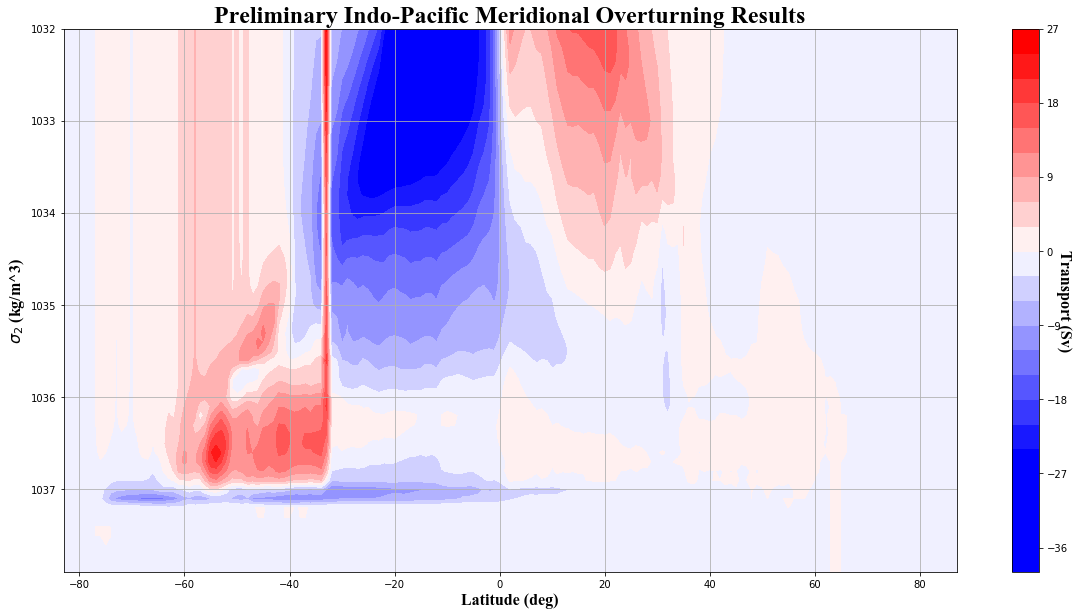

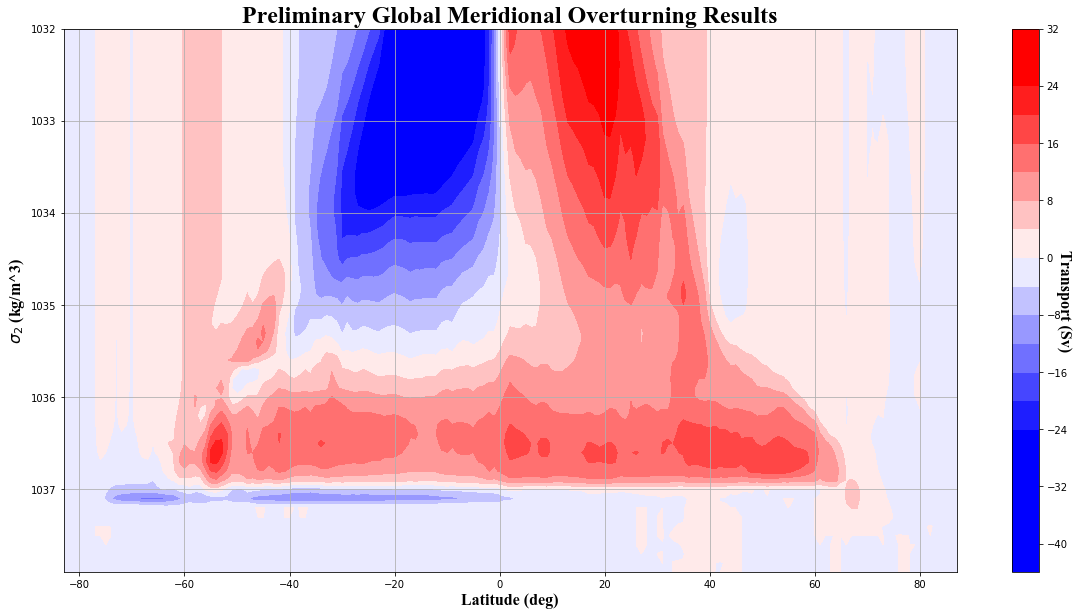

In [172]:
min_lat = 5
max_lat = 178
pvmin = -25
pvmax = 25

plt.figure(figsize=(20,10))

plt.contourf(atl_so_x.lat[min_lat:max_lat],
             atl_so_x.pot_rho[1:],
             atl_overturning,
             20,
             cmap='bwr',
            vmin=pvmin,
            vmax=pvmax)
cbar = plt.colorbar()
cbar.set_label("Transport (Sv)",rotation=270)
"""
plt.contour(atl_so_x.lat[min_lat:max_lat],
             atl_so_x.pot_rho[1:],
             atl_overturning,
             20,
           colors="k")
"""
plt.title("Preliminary Atlantic Meridional Overturning Results",fontname='times new roman',fontsize=24)
plt.xlabel("Latitude (deg)",fontname='Times New Roman',fontsize=16)
plt.ylabel("$\sigma_{2}$ (kg/m^3)",fontname='Times New Roman',fontsize=16)
cbar.set_label("Transport (Sv)",fontname='Times New Roman',fontsize=16,rotation=270)
plt.grid()
plt.gca().invert_yaxis()
plt.savefig("./figures/southern_ocean_atlantic_overturning_with_interp.png")
plt.show()
plt.close()


min_lat = 5
max_lat = 178
pvmin = -25
pvmax = 25
plt.figure(figsize=(20,10))
plt.contourf(global_x.lat[min_lat:max_lat],
             global_x.pot_rho[1:],
             indpac_overturning,
             20,
             cmap='bwr',
            vmin=pvmin,
            vmax=pvmax)
cbar = plt.colorbar()
cbar.set_label("Transport (Sv)",rotation=270)
"""
plt.contour(global_x.lat[min_lat:max_lat],
             global_x.pot_rho[1:],
             indpac_overturning,
             20,
             colors='k')
             """
plt.title("Preliminary Indo-Pacific Meridional Overturning Results",fontname='times new roman',fontsize=24)
plt.xlabel("Latitude (deg)",fontname='Times New Roman',fontsize=16)
plt.ylabel("$\sigma_{2}$ (kg/m^3)",fontname='Times New Roman',fontsize=16)
cbar.set_label("Transport (Sv)",fontname='Times New Roman',fontsize=16,rotation=270)
plt.grid()
plt.gca().invert_yaxis()
plt.savefig("./figures/southern_ocean_atlantic_overturning_with_interp.png")
plt.show()
plt.close()


min_lat = 5
max_lat = 178
pvmin = -25
pvmax = 25
plt.figure(figsize=(20,10))
plt.contourf(global_x.lat[min_lat:max_lat],
             global_x.pot_rho[1:],
             global_overturning,
             20,
             cmap='bwr',
            vmin=pvmin,
            vmax=pvmax)
cbar = plt.colorbar()
cbar.set_label("Transport (Sv)",rotation=270)
"""
plt.contour(global_x.lat[min_lat:max_lat],
             global_x.pot_rho[1:],
             global_overturning,
             20,
             colors='k')
             """
plt.title("Preliminary Global Meridional Overturning Results",fontname='times new roman',fontsize=24)
plt.xlabel("Latitude (deg)",fontname='Times New Roman',fontsize=16)
plt.ylabel("$\sigma_{2}$ (kg/m^3)",fontname='Times New Roman',fontsize=16)
cbar.set_label("Transport (Sv)",fontname='Times New Roman',fontsize=16,rotation=270)
plt.grid()
plt.gca().invert_yaxis()
plt.savefig("./figures/southern_ocean_atlantic_overturning_with_interp.png")
plt.show()
plt.close()